# K-Means

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.filterwarnings("ignore", category=FutureWarning)

### DATASET

In [2]:
df = pd.read_csv("./USArrests.csv", index_col=0)
df.head()

,Murder,Assault,UrbanPop,Rape
Alabama,13.2,236,58,21.2
Alaska,10.0,263,48,44.5
Arizona,8.1,294,80,31.0
Arkansas,8.8,190,50,19.5
California,9.0,276,91,40.6


In [3]:
df.isnull()

,Murder,Assault,UrbanPop,Rape
Alabama,False,False,False,False
Alaska,False,False,False,False
Arizona,False,False,False,False
Arkansas,False,False,False,False
California,False,False,False,False
Colorado,False,False,False,False
Connecticut,False,False,False,False
Delaware,False,False,False,False
Florida,False,False,False,False
Georgia,False,False,False,False


In [4]:
df.isnull().sum()

Murder      0
Assault     0
UrbanPop    0
Rape        0
dtype: int64

In [5]:
df.isnull().sum().sum()

0

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 50 entries, Alabama to Wyoming
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Murder    50 non-null     float64
 1   Assault   50 non-null     int64  
 2   UrbanPop  50 non-null     int64  
 3   Rape      50 non-null     float64
dtypes: float64(2), int64(2)
memory usage: 2.0+ KB


In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Murder,50.0,7.788,4.355510,0.8,4.075,7.25,11.250,17.4
Assault,50.0,170.760,83.337661,45.0,109.000,159.00,249.000,337.0
UrbanPop,50.0,65.540,14.474763,32.0,54.500,66.00,77.750,91.0
Rape,50.0,21.232,9.366385,7.3,15.075,20.10,26.175,46.0


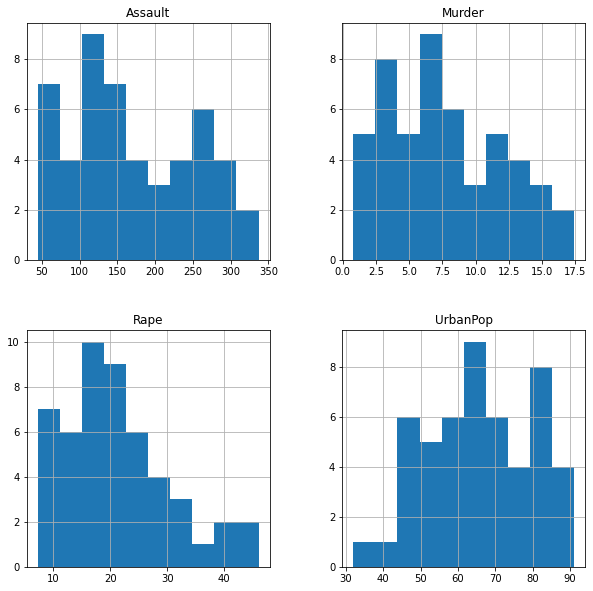

In [8]:
df.hist(figsize=(10, 10));

In [9]:
kmeans = KMeans(n_clusters=4)

In [10]:
dir(kmeans)

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_check_n_features',
 '_check_test_data',
 '_estimator_type',
 '_get_param_names',
 '_get_tags',
 '_more_tags',
 '_repr_html_',
 '_repr_html_inner',
 '_repr_mimebundle_',
 '_transform',
 '_validate_data',
 'algorithm',
 'copy_x',
 'fit',
 'fit_predict',
 'fit_transform',
 'get_params',
 'init',
 'max_iter',
 'n_clusters',
 'n_init',
 'n_jobs',
 'precompute_distances',
 'predict',
 'random_state',
 'score',
 'set_params',
 'tol',
 'transform',
 'verbose']

In [11]:
?kmeans

Type:        KMeans
String form: KMeans(n_clusters=4)
File:        c:\users\ertug\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py
Docstring:  
K-Means clustering.

Read more in the :ref:`User Guide <k_means>`.

Parameters
----------

n_clusters : int, default=8
    The number of clusters to form as well as the number of
    centroids to generate.

init : {'k-means++', 'random', ndarray, callable}, default='k-means++'
    Method for initialization:

    'k-means++' : selects initial cluster centers for k-mean
    clustering in a smart way to speed up convergence. See section
    Notes in k_init for more details.

    'random': choose `n_clusters` observations (rows) at random from data
    for the initial centroids.

    If an ndarray is passed, it should be of shape (n_clusters, n_features)
    and gives the initial centers.

    If a callable is passed, it should take arguments X, n_clusters and a
    random state and return an initialization.

n_init : int, default=10
    Numb

In [12]:
k_fit = kmeans.fit(df)

In [13]:
k_fit.n_clusters

4

In [14]:
k_fit.n_jobs

'deprecated'

In [15]:
k_fit.cluster_centers_

array([[  8.21428571, 173.28571429,  70.64285714,  22.84285714],
       [ 11.8125    , 272.5625    ,  68.3125    ,  28.375     ],
       [  2.95      ,  62.7       ,  53.9       ,  11.51      ],
       [  5.59      , 112.4       ,  65.6       ,  17.27      ]])

In [16]:
k_fit.labels_

array([1, 1, 1, 0, 1, 0, 3, 1, 1, 0, 2, 3, 1, 3, 2, 3, 3, 1, 2, 1, 0, 1,
       2, 1, 0, 3, 3, 1, 2, 0, 1, 1, 1, 2, 3, 0, 0, 3, 0, 1, 2, 0, 0, 3,
       2, 0, 0, 2, 2, 0])

### Kümelerin Görselleştirilmesi

In [17]:
kmeans = KMeans(n_clusters=2).fit(df)

In [18]:
kumeler = kmeans.labels_

In [19]:
kumeler

array([0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1])

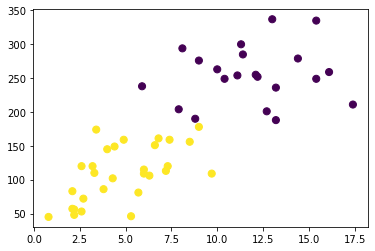

In [20]:
plt.scatter(df.iloc[:, 0], df.iloc[:, 1], c=kumeler, s=50, cmap="viridis");

In [21]:
merkezler = kmeans.cluster_centers_

In [22]:
merkezler

array([[ 11.85714286, 255.        ,  67.61904762,  28.11428571],
       [  4.84137931, 109.75862069,  64.03448276,  16.24827586]])

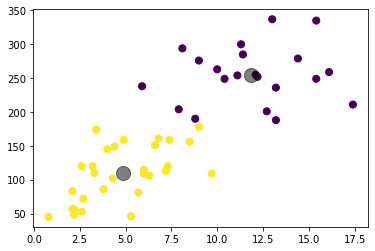

In [23]:
plt.scatter(df.iloc[:, 0], df.iloc[:, 1], c=kumeler, s=50, cmap="viridis")
plt.scatter(merkezler[:, 0], merkezler[:, 1], c="black", s=200, alpha=.5);

# OPTİMUM KÜME SAYISININ BELİRLENMESİ

### ELBOW YÖNTEMİ

In [24]:
df

,Murder,Assault,UrbanPop,Rape
Alabama,13.2,236,58,21.2
Alaska,10.0,263,48,44.5
Arizona,8.1,294,80,31.0
Arkansas,8.8,190,50,19.5
California,9.0,276,91,40.6
Colorado,7.9,204,78,38.7
Connecticut,3.3,110,77,11.1
Delaware,5.9,238,72,15.8
Florida,15.4,335,80,31.9
Georgia,17.4,211,60,25.8


In [25]:
ssd = list()  # Uzaklık farklarının karelerinin toplamı

K = range(1, 30)
for k in K:
    kmeans = KMeans(n_clusters=k).fit(df)
    ssd.append(kmeans.inertia_)

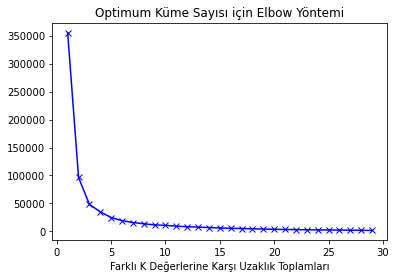

In [26]:
plt.plot(K, ssd, "bx-")
plt.xlabel("Farklı K Değerlerine Karşı Uzaklık Toplamları")
plt.title("Optimum Küme Sayısı için Elbow Yöntemi");

In [27]:
!pip install --upgrade pip

Requirement already up-to-date: pip in c:\users\ertug\anaconda3\lib\site-packages (20.2.3)


In [28]:
!pip install yellowbrick

In [29]:
from yellowbrick.cluster import KElbowVisualizer

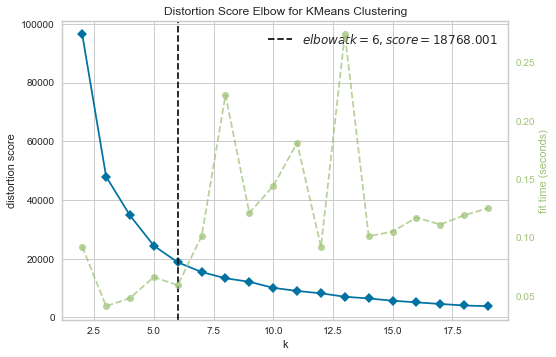

In [30]:
kmeans = KMeans()
visu = KElbowVisualizer(kmeans, k=(2, 20)).fit(df)
visu.poof();

### FINAL 

In [31]:
kmean = KMeans(n_clusters=4).fit(df)

In [32]:
kmean

KMeans(n_clusters=4)

In [33]:
kumeler = kmean.labels_
kumeler

array([2, 2, 2, 1, 2, 1, 3, 2, 2, 1, 0, 3, 2, 3, 0, 3, 3, 2, 0, 2, 1, 2,
       0, 2, 1, 3, 3, 2, 0, 1, 2, 2, 2, 0, 3, 1, 1, 3, 1, 2, 0, 1, 1, 3,
       0, 1, 1, 0, 0, 1])

In [34]:
pd.DataFrame({"Eyaletler":df.index, "Kümeler": kumeler})

,Eyaletler,Kümeler
0,Alabama,2
1,Alaska,2
2,Arizona,2
3,Arkansas,1
4,California,2
5,Colorado,1
6,Connecticut,3
7,Delaware,2
8,Florida,2
9,Georgia,1


In [35]:
df["Kume_No"] = kumeler

In [36]:
df

,Murder,Assault,UrbanPop,Rape,Kume_No
Alabama,13.2,236,58,21.2,2
Alaska,10.0,263,48,44.5,2
Arizona,8.1,294,80,31.0,2
Arkansas,8.8,190,50,19.5,1
California,9.0,276,91,40.6,2
Colorado,7.9,204,78,38.7,1
Connecticut,3.3,110,77,11.1,3
Delaware,5.9,238,72,15.8,2
Florida,15.4,335,80,31.9,2
Georgia,17.4,211,60,25.8,1
